# Offsetting the north pole of a coordinate frame

- https://docs.sunpy.org/en/stable/generated/gallery/units_and_coordinates/north_offset_frame.html

How to use `sunpy.coordinates.NorthOffsetFrame` to offset the north pole for a coordinate frame.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import NorthOffsetFrame
from sunpy.data.sample import AIA_171_IMAGE

For an AIA observation from the sample data, let's create a modified
Heliographic Stonyhurst coordinate frame with its north pole offset to
a longitude of 45 degrees and a latitude of 20 degrees.

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)

north = SkyCoord(45*u.deg, 20*u.deg,
                 frame="heliographic_stonyhurst", obstime=aiamap.date)
new_frame = NorthOffsetFrame(north=north)

Let's plot the normal Heliographic Stonyhurst coordinate frame as a white
grid and the modified coordinate frame as a blue grid.  If the north pole of
this new frame were placed at a point of interest, the lines of longitude
form great circles radially away from the point, and the lines of latitude
measure angular distance from the point.

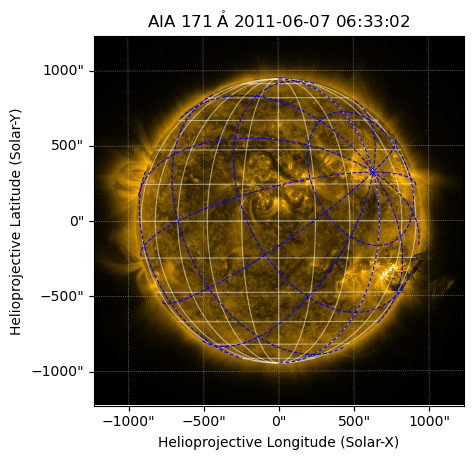

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
aiamap.draw_grid(axes=ax)

overlay = ax.get_coords_overlay(new_frame)
overlay[0].set_ticks(spacing=30. * u.deg)
overlay.grid(ls='--', color='blue')

plt.show()